In [1]:
# // CÓDIGO DE INCIAÇÃO DA TABELA // #
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

arquivo = 'output/data.csv'
usecols = ["indice", "metodo", "tipo", "tamanho", "tempo1", "tempo2", "tempo3", "tempo4", "tempo5", "tempo6", "tempo7", "tempo8", "tempo9", "tempo10"]
df = pd.read_csv(arquivo, index_col = "indice", usecols = usecols)

df

,metodo,tipo,tamanho,tempo1,tempo2,tempo3,tempo4,tempo5,tempo6,tempo7,tempo8,tempo9,tempo10
indice,,,,,,,,,,,,,
0,quickLS,1,10000,0.001142,0.001170,0.001205,0.001177,0.001135,0.001138,0.001162,0.001223,0.001150,0.001167
1,quickLS,1,50000,0.006978,0.006806,0.006661,0.006642,0.006511,0.006612,0.006477,0.006606,0.006472,0.006574
2,quickLS,1,100000,0.013521,0.013592,0.013931,0.013826,0.013741,0.013710,0.013683,0.014059,0.013737,0.013669
3,quickLS,1,500000,0.077918,0.079759,0.079247,0.077954,0.076575,0.077220,0.075376,0.069353,0.083527,0.078859
4,quickLS,1,1000000,0.159187,0.157866,0.160586,0.152897,0.129373,0.127947,0.129729,0.127694,0.130589,0.130067
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,insertionSort,2,10000,0.058113,0.058187,0.058219,0.057093,0.057319,0.057431,0.057817,0.056584,0.056842,0.055789
76,insertionSort,2,50000,1.293479,1.543789,3.026455,1.582670,1.285130,1.298118,2.552236,2.336318,1.281111,1.302901
77,insertionSort,2,100000,7.452957,7.472403,7.436267,7.479405,7.449149,7.156230,6.675745,6.666523,6.978087,7.465911


In [6]:
# // CÓDIGO PARA CRIAÇÃO DAS TABELAS DE VALOR MÉDIO // #

# Calcular o tempo médio, mínimo e máximo para cada linha
df['tempo_medio'] = df[['tempo1', 'tempo2', 'tempo3', 'tempo4', 'tempo5', 'tempo6', 'tempo7', 'tempo8', 'tempo9', 'tempo10']].mean(axis=1)
df['tempo_menor'] = df[['tempo1', 'tempo2', 'tempo3', 'tempo4', 'tempo5', 'tempo6', 'tempo7', 'tempo8', 'tempo9', 'tempo10']].min(axis=1)
df['tempo_maior'] = df[['tempo1', 'tempo2', 'tempo3', 'tempo4', 'tempo5', 'tempo6', 'tempo7', 'tempo8', 'tempo9', 'tempo10']].max(axis=1)

# Criar uma nova tabela com índice, método, tipo, tamanho, tempo médio, tempo mínimo e tempo máximo
tabela_tempos = df[['metodo', 'tipo', 'tamanho', 'tempo_medio', 'tempo_menor', 'tempo_maior']].copy()

# Exibir a tabela com os tempos médio, mínimo e máximo
print(tabela_tempos)
tabela_tempos.to_excel('output\Tempos.xlsx', index=False)


               metodo  tipo  tamanho  tempo_medio  tempo_menor  tempo_maior
indice                                                                     
0             quickLS     1    10000     0.001167     0.001135     0.001223
1             quickLS     1    50000     0.006634     0.006472     0.006978
2             quickLS     1   100000     0.013747     0.013521     0.014059
3             quickLS     1   500000     0.077579     0.069353     0.083527
4             quickLS     1  1000000     0.140593     0.127694     0.160586
...               ...   ...      ...          ...          ...          ...
75      insertionSort     2    10000     0.057339     0.055789     0.058219
76      insertionSort     2    50000     1.750221     1.281111     3.026455
77      insertionSort     2   100000     7.223268     6.666523     7.479405
78      insertionSort     2   500000   180.734168   177.424363   184.215546
79      insertionSort     2  1000000   725.295786   711.675254   741.839996

[80 rows x 

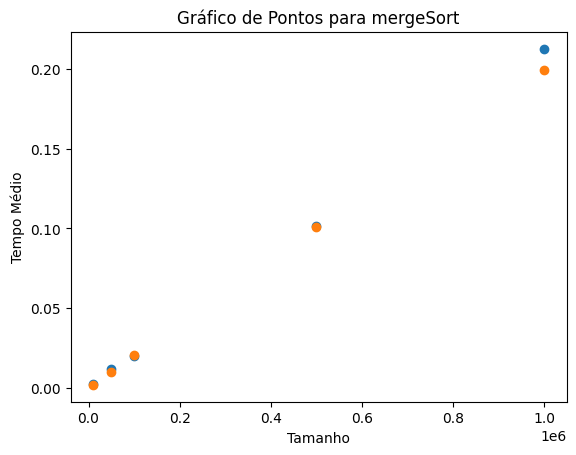

In [3]:
# // TESTE DE CRIAÇÃO DE GRÁFICO DE PONTOS // #
df_shell_sort1 = df[(df['metodo'] == 'mergeSort') & (df['tipo'] == 1)]
df_shell_sort2 = df[(df['metodo'] == 'mergeSort') & (df['tipo'] == 2)]

# Selecionando as colunas relevantes para o gráfico de pontos
coluna_tempo_medio1 = df_shell_sort1[['tempo1', 'tempo2', 'tempo3', 'tempo4', 'tempo5', 'tempo6', 'tempo7', 'tempo8', 'tempo9', 'tempo10']].mean(axis=1)
coluna_tempo_medio2 = df_shell_sort2[['tempo1', 'tempo2', 'tempo3', 'tempo4', 'tempo5', 'tempo6', 'tempo7', 'tempo8', 'tempo9', 'tempo10']].mean(axis=1)

# Plotando o gráfico de pontos
plt.scatter(df_shell_sort1["tamanho"], coluna_tempo_medio1)
plt.scatter(df_shell_sort2["tamanho"], coluna_tempo_medio2)

# Adicionando rótulos aos eixos
plt.xlabel('Tamanho')
plt.ylabel('Tempo Médio')
plt.title('Gráfico de Pontos para mergeSort')

# Exibindo o gráfico
plt.show()

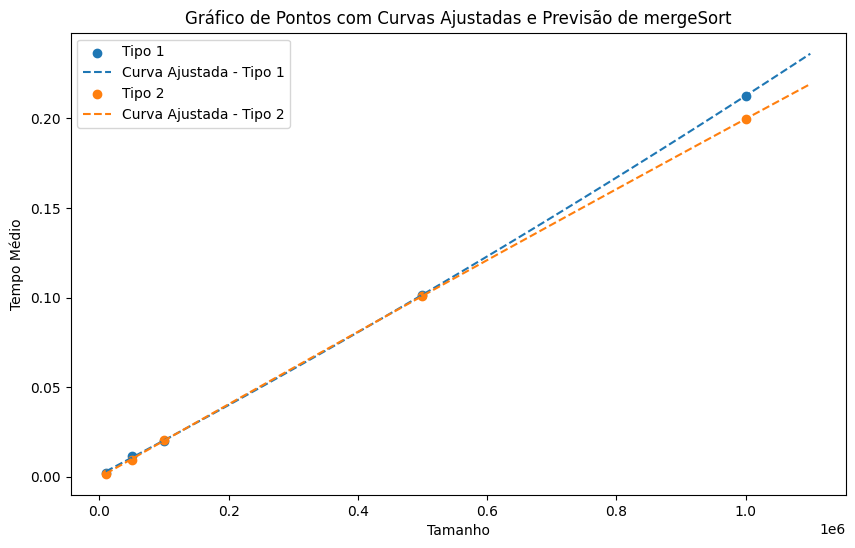

In [4]:
# // CÓDIGO DE EXPENSÃO DE GRÁFICO DE PONTOS PARA FUNÇÃO // #
metodo = 'mergeSort'

# Seu código para filtrar e calcular a média
df_shell_sort1 = df[(df['metodo'] == metodo) & (df['tipo'] == 1)]
df_shell_sort2 = df[(df['metodo'] == metodo) & (df['tipo'] == 2)]

coluna_tempo_medio1 = df_shell_sort1[['tempo1', 'tempo2', 'tempo3', 'tempo4', 'tempo5', 'tempo6', 'tempo7', 'tempo8', 'tempo9', 'tempo10']].mean(axis=1)
coluna_tempo_medio2 = df_shell_sort2[['tempo1', 'tempo2', 'tempo3', 'tempo4', 'tempo5', 'tempo6', 'tempo7', 'tempo8', 'tempo9', 'tempo10']].mean(axis=1)

# Função para ajustar uma curva
def funcao_ajuste(x, a, b, c):
    return a * x**2 + b * x + c

# Função para criar e exibir o gráfico com previsão
def criar_e_exibir_grafico_com_previsao(x, *conjuntos_de_dados, previsao_horizonte=50):
    plt.figure(figsize=(10, 6))  # Define o tamanho da figura

    # Plota os pontos para cada conjunto de dados
    for i, y in enumerate(conjuntos_de_dados):
        plt.scatter(x, y, label=f'Tipo {i + 1}')

        # Ajusta a curva aos dados
        parametros, _ = curve_fit(funcao_ajuste, x, y)

        # Gera valores preditos usando a curva ajustada
        x_predito = np.linspace(min(x), max(x) + previsao_horizonte, 100)
        y_predito = funcao_ajuste(x_predito, *parametros)

        # Plota a curva ajustada e a previsão
        plt.plot(x_predito, y_predito, label=f'Curva Ajustada - Tipo {i + 1}', linestyle='--')

    # Adiciona rótulos e título
    plt.xlabel('Tamanho')
    plt.ylabel('Tempo Médio')
    plt.title('Gráfico de Pontos com Curvas Ajustadas e Previsão de %s' % metodo)

    # Adiciona uma legenda
    plt.legend()

    # Exibe o gráfico
    plt.show()

# Exemplo de uso com previsão
criar_e_exibir_grafico_com_previsao(
    df_shell_sort1["tamanho"],
    coluna_tempo_medio1,
    coluna_tempo_medio2,
    previsao_horizonte=100000
)



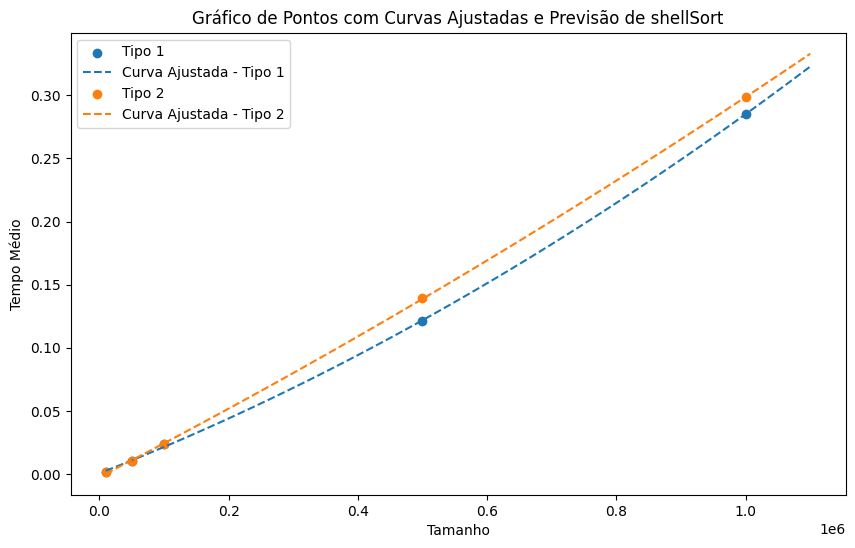

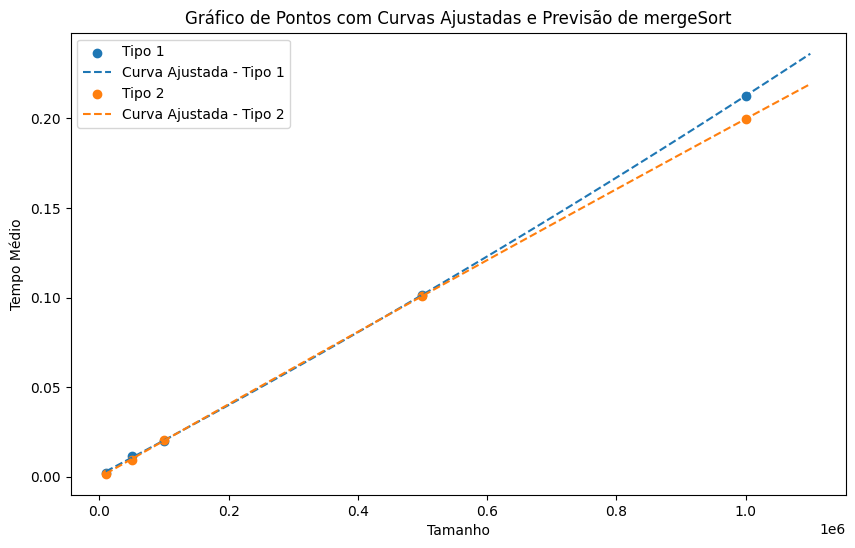

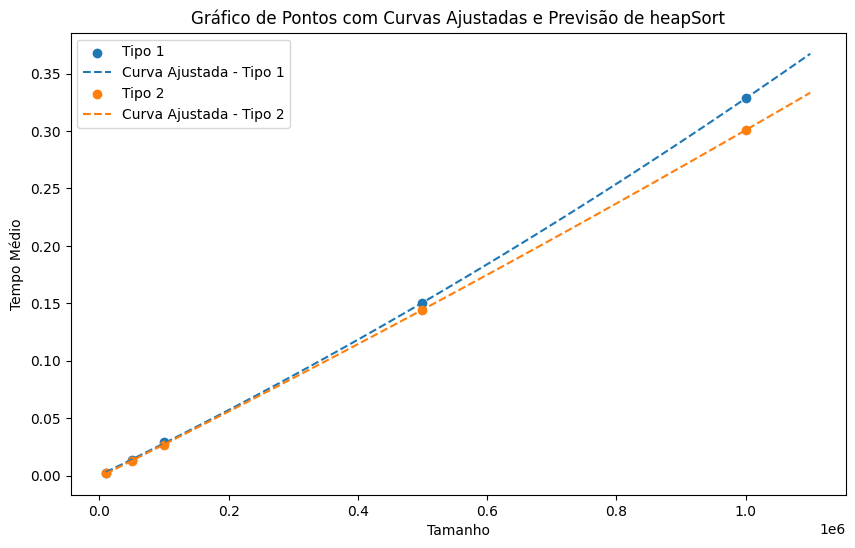

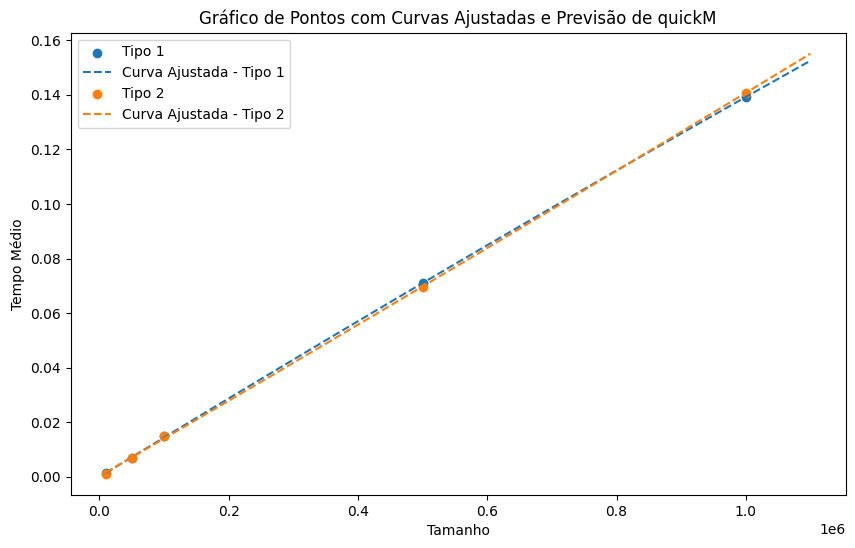

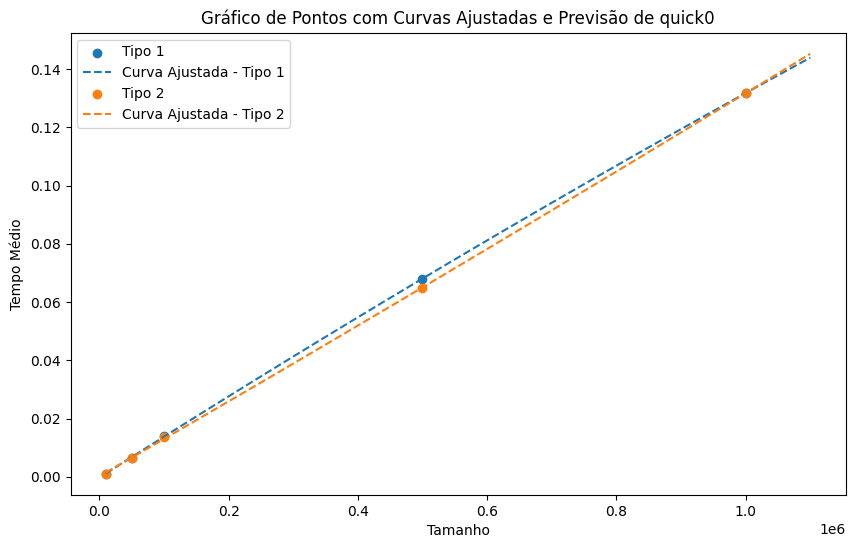

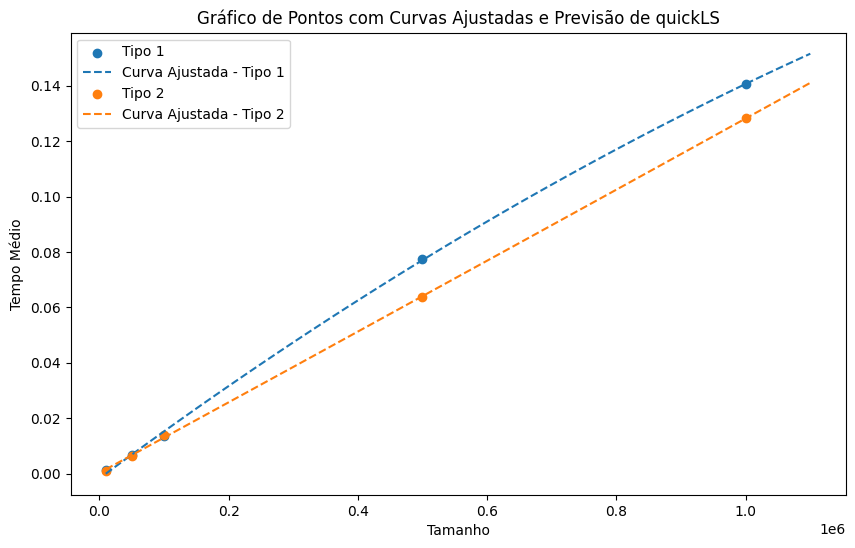

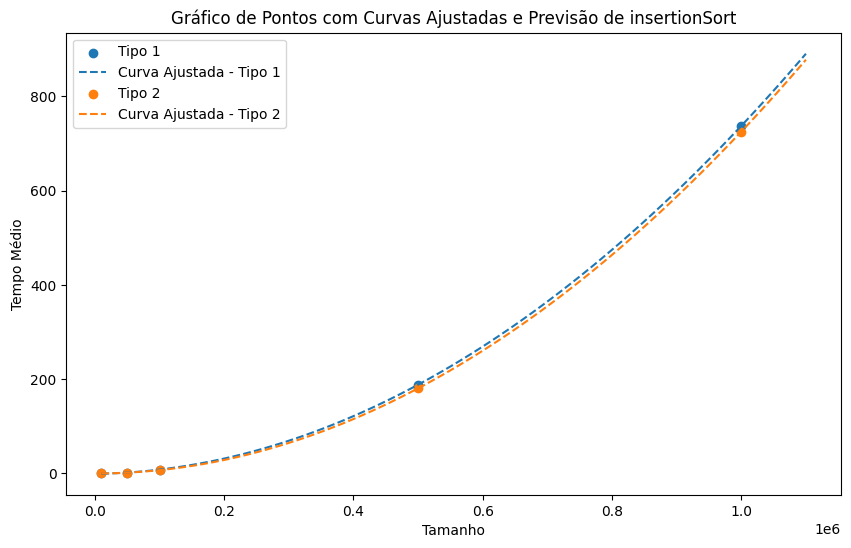

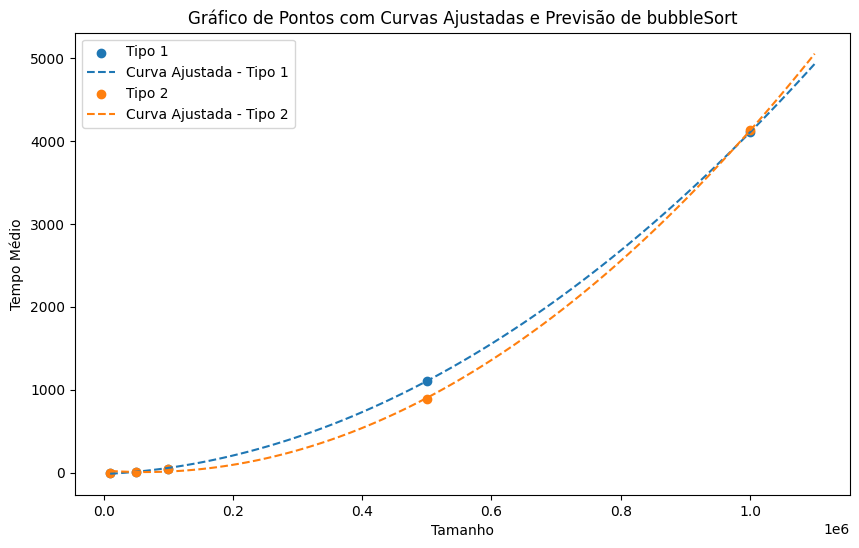

In [5]:
# // AUTOMATIZAÇÃO DO CÓDIGO DE GRÁFICOS PARA TODOS OS MÉTODOS // #
metodo = ['shellSort','mergeSort','heapSort','quickM','quick0','quickLS','insertionSort','bubbleSort']
lenmet = len(metodo)

for ima in range(lenmet):
    # Seu código para filtrar e calcular a média
    df_shell_sort1 = df[(df['metodo'] == metodo[ima]) & (df['tipo'] == 1)]
    df_shell_sort2 = df[(df['metodo'] == metodo[ima]) & (df['tipo'] == 2)]

    coluna_tempo_medio1 = df_shell_sort1[['tempo1', 'tempo2', 'tempo3', 'tempo4', 'tempo5', 'tempo6', 'tempo7', 'tempo8', 'tempo9', 'tempo10']].mean(axis=1)
    coluna_tempo_medio2 = df_shell_sort2[['tempo1', 'tempo2', 'tempo3', 'tempo4', 'tempo5', 'tempo6', 'tempo7', 'tempo8', 'tempo9', 'tempo10']].mean(axis=1)

    # Função para ajustar uma curva
    def funcao_ajuste(x, a, b, c):
        return a * x**2 + b * x + c

    # Função para criar e exibir o gráfico com previsão
    def criar_e_exibir_grafico_com_previsao(x, *conjuntos_de_dados, previsao_horizonte=50):
        plt.figure(figsize=(10, 6))  # Define o tamanho da figura

        # Plota os pontos para cada conjunto de dados
        for i, y in enumerate(conjuntos_de_dados):
            plt.scatter(x, y, label=f'Tipo {i + 1}')

            # Ajusta a curva aos dados
            parametros, _ = curve_fit(funcao_ajuste, x, y)

            # Gera valores preditos usando a curva ajustada
            x_predito = np.linspace(min(x), max(x) + previsao_horizonte, 100)
            y_predito = funcao_ajuste(x_predito, *parametros)

            # Plota a curva ajustada e a previsão
            plt.plot(x_predito, y_predito, label=f'Curva Ajustada - Tipo {i + 1}', linestyle='--')

        # Adiciona rótulos e título
        plt.xlabel('Tamanho')
        plt.ylabel('Tempo Médio')
        plt.title('Gráfico de Pontos com Curvas Ajustadas e Previsão de %s' % metodo[ima])

        # Adiciona uma legenda
        plt.legend()

        # Exibe o gráfico
        plt.show()

    # Exemplo de uso com previsão
    criar_e_exibir_grafico_com_previsao(
        df_shell_sort1["tamanho"],
        coluna_tempo_medio1,
        coluna_tempo_medio2,
        previsao_horizonte=100000
    )
    
